In [2]:
import gensim
# load word vectors
word_vectors = gensim.models.Word2Vec.load("word2vec.model")

# create list of projection data
# tuple (label, vector)
labels = word_vectors.wv.index_to_key
vectors = [word_vectors.wv[label] for label in labels]

projection_data = [(label, vector) for label, vector in zip(labels, vectors)] 

In [3]:
#from arrange_data import get_avg_embedding_dict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
import umap

/home/august/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/august/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/august/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: Th

In [50]:

catalyst_names = ['Cp2ZrCl2','Cp2HfCl2','Cp2TiCl2','EtInd2ZrCl2','(nBuCp)2ZrCl2','Me2Si(Ind)2ZrCl2','CpTi(OMe)3']
activator_names = ['MAO','TIBA','TEA','TIBAO','MMAO','methylaluminoxane','triethylaluminum','triisobutylaluminum','Et3Al','AlEtCl2','AlEt2Cl','tris(pentafluorophenyl)borane', '[CPh3][B(C6F5)4]','CPh3B(C6F5)4','ethylaluminoxane','tetrachloroaluminate','tri-isobutylaluminum','methyl-aluminoxane','tetrakis(pentafluorophenyl)borane']
monomer_names = ['propene', 'ethene', '1-butene', '1,7-octadiene', '1-hexene', '1-dodecene', '1-decene', '1-octene']


substring_list = ['Zr','Hf','Ti']
count = 0
catalysts = []
for word in word_vectors.wv.index_to_key:
    if len(word) > 5:
        if any(substring in word for substring in substring_list):
            count += 1
            catalyst_names.append(word)
catalyst_names.remove("Tissue")
catalyst_names.remove("Titania")
catalyst_names.remove("Tighter")


chemicals = [catalyst.lower() for catalyst in catalyst_names] + [activator.lower() for activator in activator_names] + [monomer.lower() for monomer in monomer_names]
lower_catalyst = [c.lower() for c in catalyst_names]
lower_activator = [c.lower() for c in activator_names]
lower_monomer = [c.lower() for c in monomer_names]

In [51]:
embeddings_df = pd.DataFrame(vectors)
embeddings_df.index = labels
# embeddings_df = pd.read_hdf('data/scibertdata.h5', key='averaged_embeddings')

In [52]:
list_of_embeddings = embeddings_df.to_numpy()

In [53]:
chemical_embeddings_df = embeddings_df.loc[[word in chemicals for word in labels]]

In [54]:
chemical_embeddings = chemical_embeddings_df.to_numpy()

In [55]:
# collapse embeddings to two dimensions
reducer = umap.UMAP()
reducer.fit(chemical_embeddings)
umap_embedding = reducer.transform(chemical_embeddings)

/home/august/.local/lib/python3.10/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [56]:
# put umap data into a new df
new_df = pd.DataFrame(umap_embedding, columns=('x','y') )
new_df['Word'] = list(chemical_embeddings_df.index)
new_df = new_df.loc[[word in chemicals for word in new_df.Word]]
new_df

,x,y,Word
0,0.189117,8.785515,titanium
1,0.912797,9.114915,methylaluminoxane
2,1.711339,9.670378,1-hexene
3,2.403076,10.386322,propene
4,1.606103,10.982258,ethene
5,1.590861,10.219846,1-octene
6,0.064790,9.847069,triisobutylaluminum
7,-0.360122,9.259743,tea
8,0.420777,10.592972,1-decene
9,0.801869,9.841690,triethylaluminum


In [57]:
r = [sns.color_palette(as_cmap=True)[3], sns.color_palette(as_cmap=True)[2], sns.color_palette(as_cmap=True)[0], sns.color_palette(as_cmap=True)[7]]

In [58]:
colors = {'catalyst': r[0], 'monomer': r[1], 'activator': r[2]}
chemical_type = ['catalyst' if c in lower_catalyst else 'monomer' if c in lower_monomer else 'activator' if c in lower_activator else 'idk' for c in new_df.Word]
new_df['labels'] = chemical_type

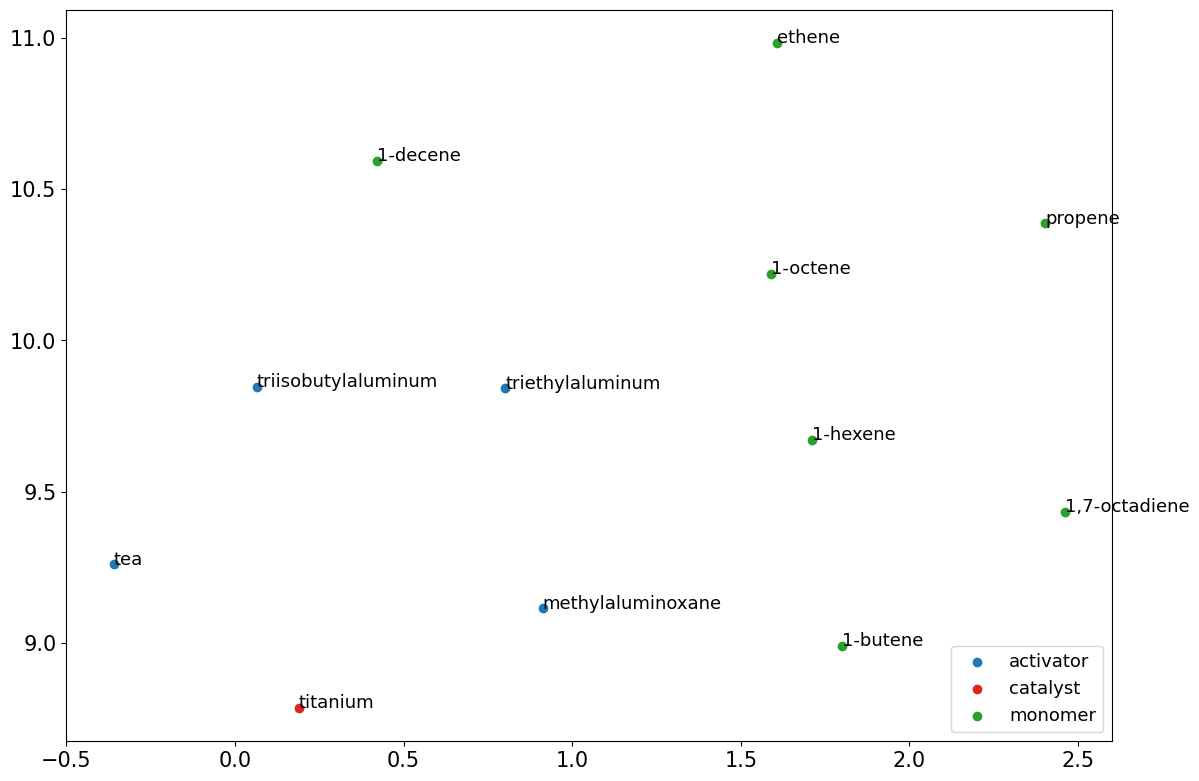

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(13.5, 9.5)
plt.rcParams['font.size'] = 13
for word in ['activator', 'catalyst', 'monomer']:
    ax.scatter(new_df.loc[new_df.labels==word].x, new_df.loc[new_df.labels==word].y, c=colors[word], label=word)

for i, txt in enumerate(new_df.Word):
    ax.annotate(txt, (new_df.x[i], new_df.y[i]))

ax.legend(loc=4)
plt.savefig('W2V.png', dpi=600)